# Week 2: Understanding Linear Regression

## 1. The Linear Regression Model

### 1.1 Mathematical Formulation

Let's break down the linear regression model step by step:

**Single Feature Case**

For a single input feature, the linear regression model is:

$y_i = wx_i + b + \epsilon_i$

Where:
* $y_i$ is the target value for the i-th example
* $x_i$ is the feature value for the i-th example
* $w$ is the weight (slope) of the line
* $b$ is the bias (y-intercept)
* $\epsilon_i$ is the error term for the i-th example

**Multiple Features Case**

When we have n features for each example:

$y_i = w_1x_{i1} + w_2x_{i2} + \cdots + w_nx_{in} + b + \epsilon_i$

Where:
* $x_{ij}$ is the j-th feature of the i-th example
* $w_j$ is the weight for the j-th feature

**Matrix Notation**

For m examples and n features, we can write this compactly as:

$y = Xw + b\mathbf{1} + \epsilon$

Where:
* $y \in \mathbb{R}^m$ is the vector of target values: $y = [y_1, y_2, \ldots, y_m]^T$
* $X \in \mathbb{R}^{m\times n}$ is the matrix of features:

$X = \begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1n} \\
x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \cdots & x_{mn}
\end{bmatrix}$

* $w \in \mathbb{R}^n$ is the weight vector: $w = [w_1, w_2, \ldots, w_n]^T$
* $b\mathbf{1}$ is the bias term repeated m times: $b\mathbf{1} = [b, b, \ldots, b]^T$
* $\epsilon \in \mathbb{R}^m$ is the vector of error terms: $\epsilon = [\epsilon_1, \epsilon_2, \ldots, \epsilon_m]^T$

**Alternative Matrix Form**

We can absorb the bias term into the weight vector by augmenting the feature matrix:

$y = \begin{bmatrix}
1 & x_{11} & \cdots & x_{1n} \\
1 & x_{21} & \cdots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & \cdots & x_{mn}
\end{bmatrix}
\begin{bmatrix}
b \\
w_1 \\
\vdots \\
w_n
\end{bmatrix} + \epsilon$

This gives us the simplified notation:

$y = X_{aug}w_{aug} + \epsilon$

Where $X_{aug}$ includes a column of ones and $w_{aug}$ includes the bias term.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

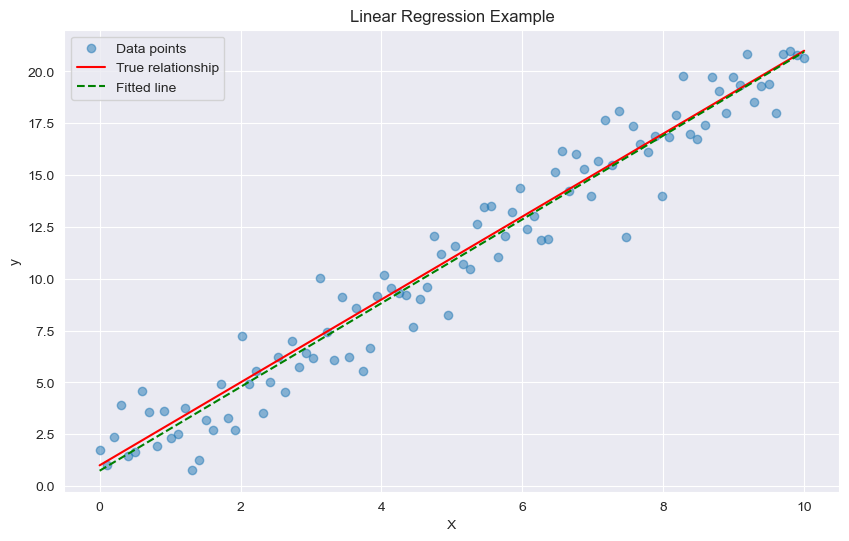

In [12]:
# Generate sample data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.normal(0, 1.5, 100)

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, 2 * X + 1, 'r', label='True relationship')
plt.plot(X, np.poly1d(np.polyfit(X, y, 1))(X), 'g--', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.grid(True)
plt.show()

### 1.3 The Loss Function

The loss function measures how well our model fits the training data. Let's examine it in detail:

**Single Feature Case**

For a single feature, the Mean Squared Error (MSE) loss is:

$J(w, b) = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2 = \frac{1}{m} \sum_{i=1}^m (y_i - (wx_i + b))^2$

Where:
* $m$ is the number of training examples
* $y_i$ is the true target value
* $\hat{y}_i = wx_i + b$ is the predicted value

The square term $(...)^2$ ensures:
* All errors are positive
* Larger errors are penalized more heavily
* The function is differentiable

**Multiple Features Case**

With n features, the MSE becomes:

$J(w, b) = \frac{1}{m} \sum_{i=1}^m \Big(y_i - \big(\sum_{j=1}^n w_jx_{ij} + b\big)\Big)^2$

This can be broken down as:
* Inner sum $\sum_{j=1}^n w_jx_{ij} + b$ computes the prediction for one example
* $(y_i - (...))^2$ computes the squared error for one example
* Outer sum $\sum_{i=1}^m$ adds up errors across all examples
* $\frac{1}{m}$ takes the average

**Matrix Notation**

Using matrix notation, we can write this compactly as:

$J(w, b) = \frac{1}{m} (y - (Xw + b\mathbf{1}))^T(y - (Xw + b\mathbf{1}))$

Or with the augmented matrix form:

$J(w_{aug}) = \frac{1}{m} (y - X_{aug}w_{aug})^T(y - X_{aug}w_{aug})$

Where:
* $(y - (...))^T(y - (...))$ is the squared Euclidean norm $\|y - (...)\|^2$
* This form is particularly useful for derivations and implementations

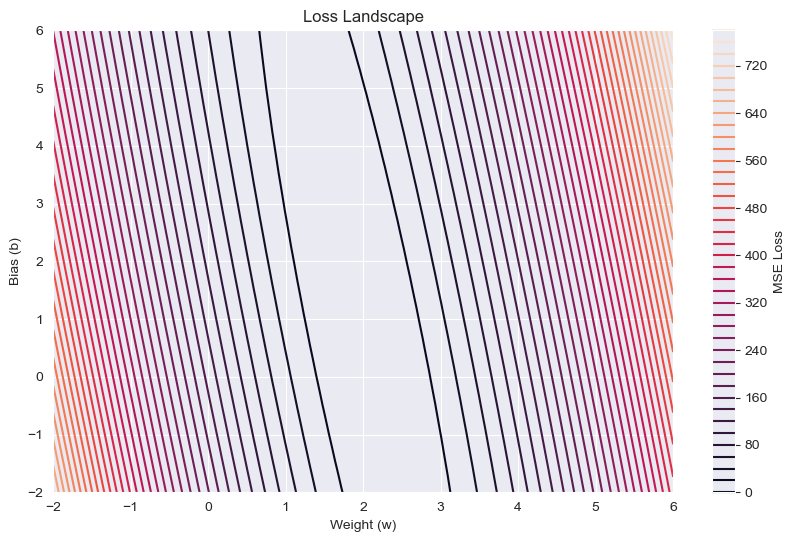

In [13]:
def compute_mse_loss(X, y, w, b):
    """
    Compute Mean Squared Error loss
    """
    m = len(y)
    predictions = np.dot(X, w) + b
    return np.mean((predictions - y) ** 2)

# Visualize the loss landscape
def plot_loss_landscape():
    w = np.linspace(-2, 6, 100)
    b = np.linspace(-2, 6, 100)
    W, B = np.meshgrid(w, b)
    Z = np.zeros_like(W)

    for i in range(len(w)):
        for j in range(len(b)):
            Z[i,j] = compute_mse_loss(X.reshape(-1,1), y, [W[i,j]], B[i,j])

    plt.figure(figsize=(10, 6))
    plt.contour(W, B, Z, levels=50)
    plt.colorbar(label='MSE Loss')
    plt.xlabel('Weight (w)')
    plt.ylabel('Bias (b)')
    plt.title('Loss Landscape')
    plt.show()

plot_loss_landscape()

## 2. Optimization Methods

### 2.1 Normal Equation

The normal equation provides an analytical solution to find the optimal parameters. Let's understand it step by step:

**Derivation of the Normal Equation**

Starting with our loss function in matrix form:

$J(w_{aug}) = \frac{1}{m}(y - X_{aug}w_{aug})^T(y - X_{aug}w_{aug})$

Expand the quadratic form:

$J(w_{aug}) = \frac{1}{m}(y^Ty - y^TX_{aug}w_{aug} - w_{aug}^TX_{aug}^Ty + w_{aug}^TX_{aug}^TX_{aug}w_{aug})$

Since $y^TX_{aug}w_{aug}$ is a scalar, it equals its transpose $w_{aug}^TX_{aug}^Ty$:

$J(w_{aug}) = \frac{1}{m}(y^Ty - 2w_{aug}^TX_{aug}^Ty + w_{aug}^TX_{aug}^TX_{aug}w_{aug})$

Take the derivative with respect to $w_{aug}$:

$\frac{\partial J}{\partial w_{aug}} = \frac{1}{m}(-2X_{aug}^Ty + 2X_{aug}^TX_{aug}w_{aug})$

Set derivative to zero and solve:

$0 = -2X_{aug}^Ty + 2X_{aug}^TX_{aug}w_{aug}$

$X_{aug}^TX_{aug}w_{aug} = X_{aug}^Ty$

$w_{aug} = (X_{aug}^TX_{aug})^{-1}X_{aug}^Ty$

In [23]:
# Example data
X = np.array([[1, 2], [2, 4], [3, 6]])  # Notice these columns are collinear
y = np.array([1, 2, 3])

# Augment X with a column of ones for the bias term
X_aug = np.c_[np.ones(len(X)), X]

# Calculate optimal parameters using the pseudo-inverse
w_aug = np.linalg.pinv(X_aug.T @ X_aug) @ X_aug.T @ y

print("Optimal parameters:")
print(f"bias (b) = {w_aug[0]:.2f}")
print(f"weights (w) = {w_aug[1:].tolist()}")

Optimal parameters:
bias (b) = 0.00
weights (w) = [0.19999999999999998, 0.39999999999999997]


**Computational Considerations**

The normal equation has:

**Advantages:**
* Direct solution (no iterations needed)
* No hyperparameters to tune
* Works well for small to medium datasets

**Disadvantages:**
* Computing $(X_{aug}^TX_{aug})^{-1}$ is $O(n^3)$
* Memory intensive for large datasets
* Can be numerically unstable if features are highly correlated

**When to Use Normal Equation**

Recommended when:
* $n < 10,000$ (features)
* Features are well-conditioned
* Direct solution is needed

Not recommended when:
* $n$ is very large
* Features are highly correlated
* Memory is limited

In [24]:
def normal_equation(X, y):
    """
    Solve linear regression using the normal equation
    """
    # Add bias term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Use pseudoinverse instead of direct inverse
    theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    # Return coefficients and intercept
    return theta[1:], theta[0]

coef, intercept = normal_equation(X, y)
print("Coefficients:", coef)
print("Intercept:", intercept)

Coefficients: [0.2 0.4]
Intercept: 1.2212453270876722e-15


### 2.2 Gradient Descent

When the normal equation is impractical, we use gradient descent to iteratively find the optimal parameters. Let's understand how it works:

**Gradient Derivation**

Starting with our loss function for a single example:

$J_i(w, b) = (y_i - (w^Tx_i + b))^2$

Derivative with respect to weight $w_j$:

$\frac{\partial J_i}{\partial w_j} = -2x_{ij}(y_i - (w^Tx_i + b))$

Derivative with respect to bias $b$:

$\frac{\partial J_i}{\partial b} = -2(y_i - (w^Tx_i + b))$

For the full dataset (averaging over m examples):

$\frac{\partial J}{\partial w_j} = -\frac{2}{m}\sum_{i=1}^m x_{ij}(y_i - (w^Tx_i + b))$

$\frac{\partial J}{\partial b} = -\frac{2}{m}\sum_{i=1}^m(y_i - (w^Tx_i + b))$

**Update Rules**

For each iteration t:

$w_j^{(t+1)} = w_j^{(t)} - \alpha \frac{\partial J}{\partial w_j^{(t)}}$

$b^{(t+1)} = b^{(t)} - \alpha \frac{\partial J}{\partial b^{(t)}}$

Where:
* $\alpha$ is the learning rate (step size)
* Superscript $(t)$ indicates iteration number

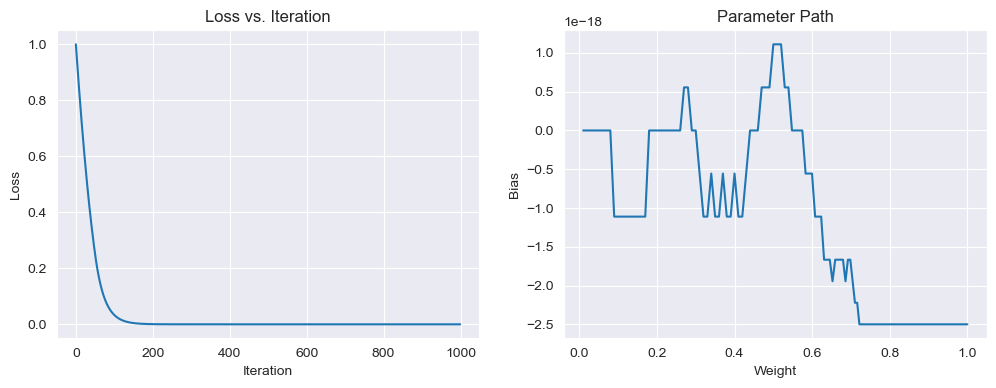

In [29]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    """
    Numerically stable implementation of gradient descent

    Parameters:
    -----------
    X : array-like of shape (m, n)
        Training features
    y : array-like of shape (m,)
        Target values
    learning_rate : float
        Step size for gradient updates
    n_iterations : int
        Number of iterations to run

    Returns:
    --------
    w : array-like of shape (n,)
        Optimal weights
    b : float
        Optimal bias
    history : dict
        Training history
    """
    # Feature scaling for numerical stability
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_scaled = (X - X_mean) / (X_std + 1e-8)  # Add small epsilon to avoid division by zero

    # Target scaling
    y_mean = np.mean(y)
    y_std = np.std(y)
    y_scaled = (y - y_mean) / (y_std + 1e-8)

    m, n = X_scaled.shape
    w = np.zeros(n)
    b = 0
    history = {'loss': [], 'w': [], 'b': []}

    for iteration in range(n_iterations):
        # Compute predictions
        y_pred = np.dot(X_scaled, w) + b

        # Compute error
        error = y_scaled - y_pred

        # Compute gradients with numerical stability
        dw = -(2/m) * X_scaled.T.dot(error)
        db = -(2/m) * np.sum(error)

        # Gradient clipping to prevent exploding gradients
        max_grad_norm = 1.0
        dw_norm = np.linalg.norm(dw)
        if dw_norm > max_grad_norm:
            dw = dw * max_grad_norm / dw_norm

        # Update parameters with stability checks
        w_new = w - learning_rate * dw
        b_new = b - learning_rate * db

        # Check for numerical stability
        if np.all(np.isfinite(w_new)) and np.isfinite(b_new):
            w = w_new
            b = b_new
        else:
            print(f"Warning: Numerical instability detected at iteration {iteration}")
            break

        # Compute loss with numerical stability
        loss = np.mean(np.square(error))
        if np.isfinite(loss):
            history['loss'].append(loss)
            history['w'].append(w.copy())
            history['b'].append(b)
        else:
            print(f"Warning: Invalid loss value at iteration {iteration}")
            break

    # Unscale parameters for original feature space
    w = w * (y_std / (X_std + 1e-8))
    b = y_mean - np.sum(w * X_mean)

    return w, b, history

# Example usage with stability checks
def run_gradient_descent_example():
    # Generate sample data
    np.random.seed(42)
    X = np.random.randn(100, 1) * 10  # Intentionally large scale
    true_w = 2.5
    true_b = 3.0
    y = true_w * X.squeeze() + true_b + np.random.randn(100) * 0.1

    print("Data statistics:")
    print(f"X mean: {np.mean(X):.2f}, X std: {np.std(X):.2f}")
    print(f"y mean: {np.mean(y):.2f}, y std: {np.std(y):.2f}")

    # Run gradient descent with different learning rates
    learning_rates = [0.01, 0.1, 0.5]
    plt.figure(figsize=(15, 5))

    for lr in learning_rates:
        w, b, history = gradient_descent(X, y, learning_rate=lr)

        plt.subplot(131)
        plt.plot(history['loss'], label=f'lr={lr}')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Training Loss')
        plt.legend()

        plt.subplot(132)
        plt.scatter(X, y, alpha=0.5, label='Data')
        plt.plot(X, w*X.squeeze() + b, 'r-',
                 label=f'Fit (lr={lr})')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Model Fit')
        plt.legend()

        plt.subplot(133)
        plt.plot([h[0] for h in history['w']], history['b'],
                 label=f'lr={lr}')
        plt.xlabel('Weight')
        plt.ylabel('Bias')
        plt.title('Parameter Path')
        plt.legend()

    plt.tight_layout()
    plt.show()

    return w, b, history

# Example usage
X = np.array([[1], [2], [3], [4]])
y = np.array([2, 4, 6, 8])
w, b, history = gradient_descent(X, y)

# Plot convergence
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history['loss'])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')

plt.subplot(122)
plt.plot([h[0] for h in history['w']], history['b'])
plt.xlabel('Weight')
plt.ylabel('Bias')
plt.title('Parameter Path')
plt.show()

**Learning Rate Selection**

The learning rate $\alpha$ is crucial for convergence:

* Too large: May diverge
* Too small: Slow convergence
* Just right: Efficient convergence

Visual example of different learning rates:

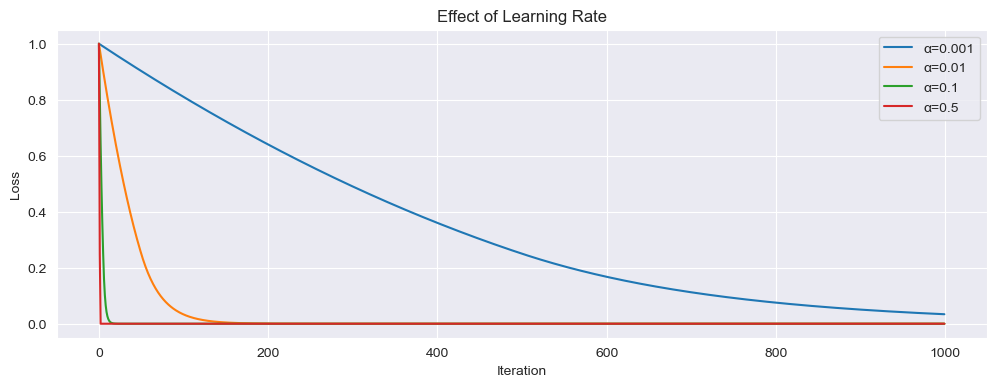

In [30]:
def plot_learning_rates():
    learning_rates = [0.001, 0.01, 0.1, 0.5]
    plt.figure(figsize=(12, 4))

    for lr in learning_rates:
        _, _, history = gradient_descent(X, y, learning_rate=lr)
        plt.plot(history['loss'], label=f'α={lr}')

    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Effect of Learning Rate')
    plt.legend()
    plt.show()

plot_learning_rates()

#### Variants of Gradient Descent
1. Batch Gradient Descent (shown above):
   - Uses all examples in each iteration
   - More stable, but slower for large datasets

2. Stochastic Gradient Descent (SGD):
   - Updates parameters using one example at a time
   - Faster but noisier convergence

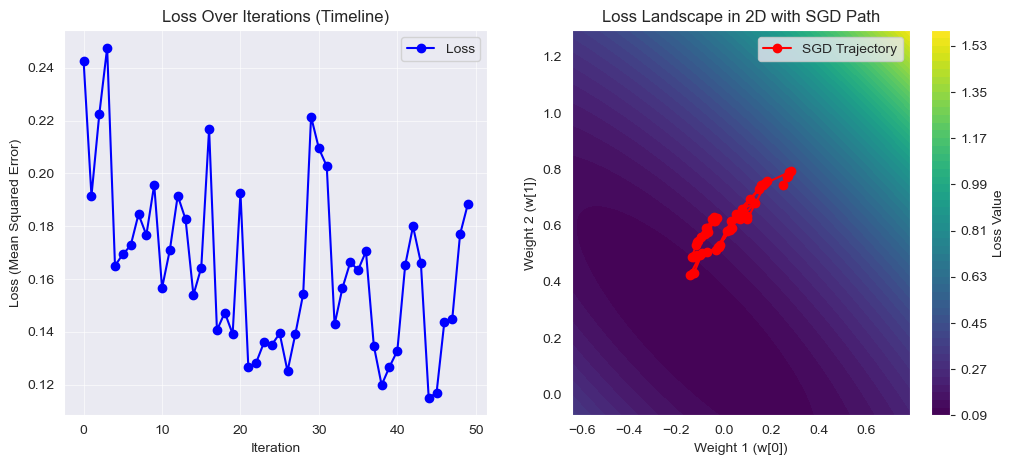

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data for visualization
np.random.seed(0)  # For reproducibility
X = np.random.rand(10, 2)  # Example: 10 samples, 2 features
y = np.random.rand(10)  # 10 labels
w = np.random.rand(2)  # Initial random weights for 2 features
b = 0  # Initial bias term

# Defining the number of samples and the learning rate
m = X.shape[0]
learning_rate = 0.1

# Initialize arrays to store loss values and parameter updates
loss_history = []
w_history = [w.copy()]  # Track weights during optimization
b_history = [b]  # Track bias during optimization


# Define the loss function: Mean Squared Error
def compute_loss(y, y_pred):
    return np.mean((y - y_pred) ** 2)


# Perform multiple SGD steps
iterations = 50  # Number of SGD iterations
for _ in range(iterations):
    # Randomly select one sample for an SGD step
    i = np.random.randint(m)
    y_pred = np.dot(X, w) + b  # Predictions for all samples
    y_pred_i = y_pred[i]  # Predicted value for the selected sample

    # Compute the gradients
    dw = -2 * X[i] * (y[i] - y_pred_i)
    db = -2 * (y[i] - y_pred_i)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Track loss and updated parameters
    current_loss = compute_loss(y, np.dot(X, w) + b)
    loss_history.append(current_loss)
    w_history.append(w.copy())
    b_history.append(b)

# Convert history to arrays for graphing
w_history = np.array(w_history)
b_history = np.array(b_history)

# Plot 1: Loss over iterations (Timeline)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(iterations), loss_history, marker='o', color='blue', label='Loss')
plt.title("Loss Over Iterations (Timeline)")
plt.xlabel("Iteration")
plt.ylabel("Loss (Mean Squared Error)")
plt.grid(alpha=0.6)
plt.legend()

# Plot 2: Loss landscape and trajectory in 2D
# Create a grid for contour plot
w1_space = np.linspace(np.min(w_history[:, 0]) - 0.5, np.max(w_history[:, 0]) + 0.5, 100)
w2_space = np.linspace(np.min(w_history[:, 1]) - 0.5, np.max(w_history[:, 1]) + 0.5, 100)
W1, W2 = np.meshgrid(w1_space, w2_space)
Loss_grid = np.zeros_like(W1)

# Compute the loss for the entire grid
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        w_test = np.array([W1[i, j], W2[i, j]])
        Loss_grid[i, j] = compute_loss(y, np.dot(X, w_test) + b)

# Plot the contour graph
plt.subplot(1, 2, 2)
contour = plt.contourf(W1, W2, Loss_grid, levels=50, cmap='viridis')
plt.colorbar(contour, label="Loss Value")
plt.plot(w_history[:, 0], w_history[:, 1], marker='o', color='red', label='SGD Trajectory')  # SGD Steps
plt.title("Loss Landscape in 2D with SGD Path")
plt.xlabel("Weight 1 (w[0])")
plt.ylabel("Weight 2 (w[1])")
plt.legend()
plt.show()


3. Mini-batch Gradient Descent:
   - Updates using small batches of examples
   - Good balance between batch and SGD

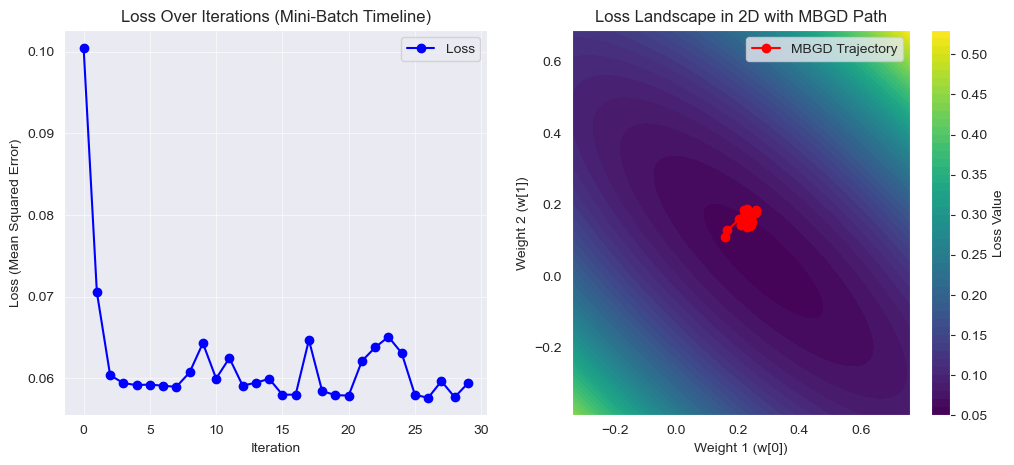

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data for visualization
np.random.seed(0)  # For reproducibility
X = np.random.rand(20, 2)  # Example: 20 samples, 2 features
y = np.random.rand(20)  # 20 labels
w = np.random.rand(2)  # Initial random weights for 2 features
b = 0  # Initial bias term

# Defining the number of samples, batch size, and learning rate
m = X.shape[0]
batch_size = 5  # Mini-batch size
learning_rate = 0.1

# Initialize arrays to store loss values and parameter updates
loss_history = []
w_history = [w.copy()]  # Track weights during optimization
b_history = [b]  # Track bias during optimization


# Define the loss function: Mean Squared Error
def compute_loss(y, y_pred):
    return np.mean((y - y_pred) ** 2)


# Perform multiple MBGD steps
iterations = 30  # Number of mini-batch gradient descent iterations
for _ in range(iterations):
    # Randomly select a mini-batch of samples
    batch_indices = np.random.choice(m, batch_size, replace=False)
    X_batch = X[batch_indices]
    y_batch = y[batch_indices]

    # Compute predictions for the mini-batch
    y_pred_batch = np.dot(X_batch, w) + b

    # Compute gradients for weights and bias
    dw = -(2 / batch_size) * X_batch.T.dot(y_batch - y_pred_batch)
    db = -(2 / batch_size) * np.sum(y_batch - y_pred_batch)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Track loss and updated parameters
    current_loss = compute_loss(y, np.dot(X, w) + b)  # Loss for all input, not just batch
    loss_history.append(current_loss)
    w_history.append(w.copy())
    b_history.append(b)

# Convert history to arrays for graphing
w_history = np.array(w_history)
b_history = np.array(b_history)

# Plot 1: Loss over iterations (Timeline)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(iterations), loss_history, marker='o', color='blue', label='Loss')
plt.title("Loss Over Iterations (Mini-Batch Timeline)")
plt.xlabel("Iteration")
plt.ylabel("Loss (Mean Squared Error)")
plt.grid(alpha=0.6)
plt.legend()

# Plot 2: Loss landscape and trajectory in 2D
# Create a grid for contour plot
w1_space = np.linspace(np.min(w_history[:, 0]) - 0.5, np.max(w_history[:, 0]) + 0.5, 100)
w2_space = np.linspace(np.min(w_history[:, 1]) - 0.5, np.max(w_history[:, 1]) + 0.5, 100)
W1, W2 = np.meshgrid(w1_space, w2_space)
Loss_grid = np.zeros_like(W1)

# Compute the loss for the entire grid
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        w_test = np.array([W1[i, j], W2[i, j]])
        Loss_grid[i, j] = compute_loss(y, np.dot(X, w_test) + b)

# Plot the contour graph
plt.subplot(1, 2, 2)
contour = plt.contourf(W1, W2, Loss_grid, levels=50, cmap='viridis')
plt.colorbar(contour, label="Loss Value")
plt.plot(w_history[:, 0], w_history[:, 1], marker='o', color='red', label='MBGD Trajectory')  # Mini-batch steps
plt.title("Loss Landscape in 2D with MBGD Path")
plt.xlabel("Weight 1 (w[0])")
plt.ylabel("Weight 2 (w[1])")
plt.legend()
plt.show()


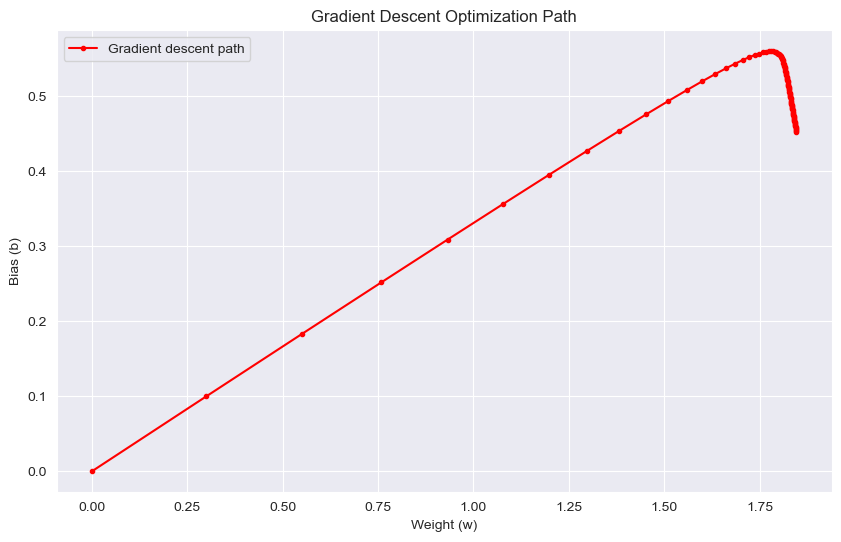

In [34]:
def gradient_descent_step(X, y, w, b, learning_rate):
    """
    Perform one step of gradient descent
    """
    m = len(y)
    predictions = np.dot(X, w) + b

    dw = -(2/m) * X.T.dot(y - predictions)
    db = -(2/m) * np.sum(y - predictions)

    w = w - learning_rate * dw
    b = b - learning_rate * db

    return w, b

# Visualize gradient descent path
def plot_gradient_descent_path():
    w = np.zeros(1)
    b = 0
    path_w = [w[0]]
    path_b = [b]

    for _ in range(100):
        w, b = gradient_descent_step(X.reshape(-1,1), y, w, b, 0.01)
        path_w.append(w[0])
        path_b.append(b)

    plt.figure(figsize=(10, 6))
    plt.plot(path_w, path_b, 'r.-', label='Gradient descent path')
    plt.xlabel('Weight (w)')
    plt.ylabel('Bias (b)')
    plt.title('Gradient Descent Optimization Path')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_gradient_descent_path()

## 3. Error Analysis

### 3.1 Bias-Variance Decomposition

The expected prediction error can be decomposed into:

$$E[(y - \hat{f}(x))^2] = \text{Bias}[\hat{f}(x)]^2 + \text{Var}[\hat{f}(x)] + \sigma^2$$


| **Aspect** | **Bias** | **Variance** |
| --- | --- | --- |
| **Definition** | Error from oversimplifying the model. | Error from overfitting to training data. |
| **Model Type** | Models too simple (e.g., linear) | Models too complex (e.g., high-degree) |
| **Training Error** | High (underfitting) | Low (overfitting) |
| **Test Error** | High | High |
| **Main Problem** | Fails to capture enough data patterns | Fails to generalize well to new data |
| **Fix** | Increase model complexity | Decrease model complexity |

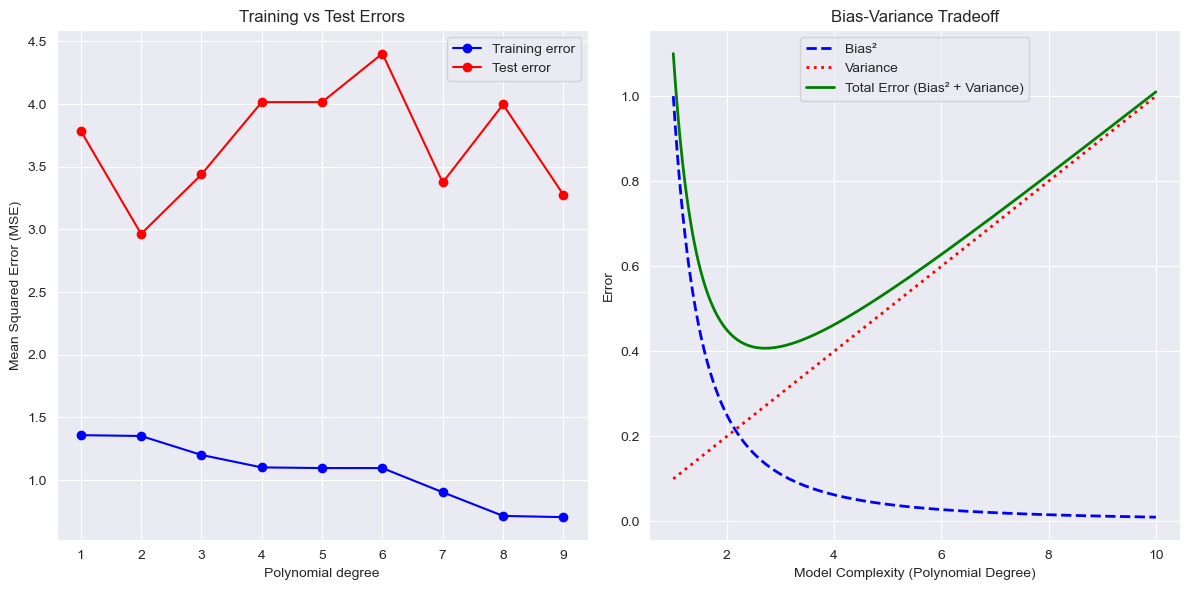

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
np.random.seed(0)
X = np.linspace(0, 10, 20)  # 20 points between 0 and 10
y = 2 * X + 1 + np.random.normal(0, 1.5, 20)  # Linear data with noise


def plot_bias_variance_tradeoff_with_graph():
    degrees = range(1, 10)
    train_errors = []
    test_errors = []

    for degree in degrees:
        # Create a Vandermonde matrix (Design matrix) for training
        poly_features = np.vander(X, degree + 1, increasing=True)

        # Compute weights using the normal equation
        w = np.linalg.inv(poly_features.T.dot(poly_features)).dot(poly_features.T).dot(y)

        # Compute predictions on the training data
        train_pred = poly_features.dot(w)
        train_errors.append(np.mean((y - train_pred) ** 2))

        # Generate test data
        X_test = np.linspace(0, 10, 100)
        y_test = 2 * X_test + 1 + np.random.normal(0, 1.5, 100)

        # Create a Vandermonde matrix for the test data
        poly_test = np.vander(X_test, degree + 1, increasing=True)
        test_pred = poly_test.dot(w)
        test_errors.append(np.mean((y_test - test_pred) ** 2))

    # Simulate bias, variance, and error curves (conceptual visualization)
    complexities = np.linspace(1, 10, 500)  # Model complexity (degree)
    bias = 1 / complexities  # Simulating bias (decreasing with complexity)
    variance = complexities / 10  # Simulating variance (increasing with complexity)
    error = bias ** 2 + variance  # Total error is bias^2 + variance

    # Plot errors (training and test errors) and theoretical bias-variance tradeoff
    plt.figure(figsize=(12, 6))

    # Error curves
    plt.subplot(1, 2, 1)
    plt.plot(degrees, train_errors, 'b-o', label='Training error')
    plt.plot(degrees, test_errors, 'r-o', label='Test error')
    plt.xlabel('Polynomial degree')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Training vs Test Errors')
    plt.legend()
    plt.grid(True)

    # Bias-Variance tradeoff with total error
    plt.subplot(1, 2, 2)
    plt.plot(complexities, bias ** 2, label='Bias²', color='blue', linestyle='dashed', linewidth=2)
    plt.plot(complexities, variance, label='Variance', color='red', linestyle='dotted', linewidth=2)
    plt.plot(complexities, error, label='Total Error (Bias² + Variance)', color='green', linewidth=2)
    plt.xlabel('Model Complexity (Polynomial Degree)')
    plt.ylabel('Error')
    plt.title('Bias-Variance Tradeoff')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# Call the function
plot_bias_variance_tradeoff_with_graph()


### 1. Mean Squared Error (MSE):

#### Formula:
$MSE = \frac{1}{m}\sum_{i=1}^m(y_i - \hat{y}_i)^2$

#### Why is MSE needed?
* **Use Case:** MSE is one of the most commonly used metrics for regression tasks.
* It penalizes **larger errors significantly more** than smaller errors because the differences are squared. For instance, if one prediction is off by 10 units and another by 1 unit, the first error contributes 100 times more to the metric than the second error.
* **Intuition:** Squaring amplifies large deviations, making this metric particularly useful to discourage models from making predictions with outliers or widely varying errors.

### 2. Root Mean Squared Error (RMSE):

#### Formula:
$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^m(y_i - \hat{y}_i)^2}$

#### Why is RMSE needed?
* **Use Case:** RMSE is the square root of MSE. Bringing the error metric back to the original unit of measurement makes it easier to interpret in the context of the problem.
* RMSE is favored when large errors are undesirable, and the cost or loss associated with larger errors scales significantly.

### 3. Mean Absolute Error (MAE):

#### Formula:
$MAE = \frac{1}{m}\sum_{i=1}^m|y_i - \hat{y}_i|$

#### Why is MAE needed?
* **Use Case:** MAE provides a **simple, averaged assessment** of errors without squaring. It is less sensitive to large errors compared to MSE and RMSE.
* MAE is useful when all deviations from the actual value are treated equally, whether large or small.

### 4. R-squared (R²):

#### Formula:
$R^2 = 1 - \frac{\sum_{i=1}^m(y_i - \hat{y}_i)^2}{\sum_{i=1}^m(y_i - \bar{y})^2}$

#### Why is R² needed?
* **Use Case:** R-squared is a **relative metric** that tells us how much variance in the target variable is explained by the model, compared to a simple mean-based model.
* The numerator measures the residual variance (prediction errors)
* The denominator quantifies the total variance in the ground truth
* If the model perfectly predicts the data, $R^2$ will be $1$. If it performs no better than predicting the mean value, $R^2$ will be $0$. If the model performs worse than a simple mean predictor, $R^2$ can even be negative.

MSE: 0.38
RMSE: 0.61
MAE: 0.50
R-squared: 0.95


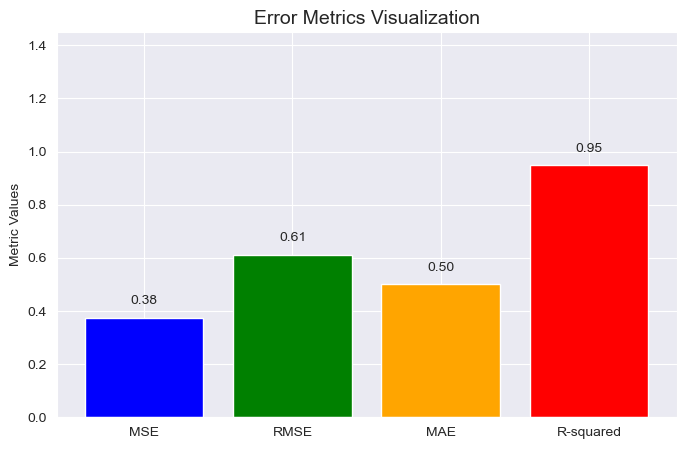

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Define actual and predicted values (example dataset)
y_actual = np.array([3, -0.5, 2, 7])
y_predicted = np.array([2.5, 0.0, 2, 8])


# Mean Squared Error (MSE)
def calculate_mse(y_actual, y_predicted):
    errors = y_actual - y_predicted
    mse = np.mean(errors ** 2)
    return mse


# Root Mean Squared Error (RMSE)
def calculate_rmse(y_actual, y_predicted):
    mse = calculate_mse(y_actual, y_predicted)
    rmse = np.sqrt(mse)
    return rmse


# Mean Absolute Error (MAE)
def calculate_mae(y_actual, y_predicted):
    errors = np.abs(y_actual - y_predicted)
    mae = np.mean(errors)
    return mae


# R-squared (R²)
def calculate_r2(y_actual, y_predicted):
    y_mean = np.mean(y_actual)
    total_variance = np.sum((y_actual - y_mean) ** 2)
    residual_variance = np.sum((y_actual - y_predicted) ** 2)
    r2 = 1 - (residual_variance / total_variance)
    return r2


# Calculate Metrics
mse = calculate_mse(y_actual, y_predicted)
rmse = calculate_rmse(y_actual, y_predicted)
mae = calculate_mae(y_actual, y_predicted)
r2 = calculate_r2(y_actual, y_predicted)

# Print Metrics
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualization
metric_names = ['MSE', 'RMSE', 'MAE', 'R-squared']
metric_values = [mse, rmse, mae, r2]

plt.figure(figsize=(8, 5))
bars = plt.bar(metric_names, metric_values, color=['blue', 'green', 'orange', 'red'])
plt.title("Error Metrics Visualization", fontsize=14)
plt.ylabel("Metric Values")
plt.ylim(0, max(metric_values) + 0.5)

# Adding values on top of bars
for bar, value in zip(bars, metric_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.05, f"{value:.2f}", ha='center')

plt.show()
